# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [2]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [59]:
# place your code into this Code cell
df = pd.read_csv('./data/attendance_data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

- The data i have chosen is taken from [Connecticut school attendance data for 3 school years](https://catalog.data.gov/dataset/school-attendance-by-student-group-and-district-2021-2022).
- This dataset includes the attendance rate for public school students PK-12 by student group for 3 academic years.

- Below I show 5 randomly selected rows from the dataset. 

In [60]:
df.sample(5)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
1673,2180012,Regional School District 18,Students With Disabilities,Students With Disabilities,154,0.9241,149.0,0.9494,158.0,0.9456,June 2022,07/22/2022
1570,2070012,Regional School District 07,NaN,All Students,906,0.9313,976.0,0.9650,1030.0,0.9485,June 2022,07/22/2022
764,0880011,Naugatuck School District,High Needs,Students Without High Needs,1518,0.9411,1413.0,0.9447,1611.0,0.9536,June 2022,07/22/2022
1379,1540011,Westbrook School District,Race/Ethnicity,White,425,0.9240,446.0,0.9731,463.0,0.9520,June 2022,07/22/2022
1987,9000016,Connecticut Technical Education and Career System,Race/Ethnicity,White,4453,0.9074,4617.0,0.9432,4537.0,0.9489,June 2022,07/22/2022


- Below I show the column names in my data and its datatype!

In [61]:
df.dtypes

District code                                object
District name                                object
Category                                     object
Student group                                object
2021-2022 student count - year to date        int64
2021-2022 attendance rate - year to date    float64
2020-2021 student count                     float64
2020-2021 attendance rate                   float64
2019-2020 student count                     float64
2019-2020 attendance rate                   float64
Reporting period                             object
Date update                                  object
dtype: object

- Below I check to see if there are any missing values in my dataset

In [62]:
bad_rows = df[ df.isnull().any(axis=1) ]
bad_rows.head(3)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022
14,0010011,Andover School District,Students With Disabilities,Students With Disabilities,23,0.9315,NaN,NaN,NaN,NaN,June 2022,07/22/2022


- The dataset consists of data for each school district in connecticut and an overall data for the state at the top

In [63]:
df.loc[1:20]

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022
10,00000CT,Connecticut,Race/Ethnicity,White,242188,0.9338,248226.0,0.9523,259933.0,0.9543,June 2022,07/22/2022


- There are various categories by which the students are grouped in this dataset. But not all school districts have data for all the categories. The data source doesn't mention the reason for this. In Bethany school distrct all students who are of colour come under "All Other Races" category, whereas in Berlin school district that category doesn't represent the Black and Hispanic students.

In [64]:
df.loc[58:76]

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
58,0070011,Berlin School District,NaN,All Students,2613,0.9341,2680.0,0.9542,2700.0,0.9562,June 2022,07/22/2022
59,0070011,Berlin School District,Students With Disabilities,Students With Disabilities,385,0.9070,403.0,0.9249,398.0,0.9356,June 2022,07/22/2022
60,0070011,Berlin School District,Free/Reduced Lunch,Free Meal Eligible,429,0.9039,504.0,0.9183,504.0,0.9379,June 2022,07/22/2022
61,0070011,Berlin School District,Free/Reduced Lunch,Reduced Price Meal Eligible,128,0.9146,126.0,0.9532,83.0,0.9543,June 2022,07/22/2022
62,0070011,Berlin School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,557,0.9063,630.0,0.9253,587.0,0.9403,June 2022,07/22/2022
63,0070011,Berlin School District,English Learners,English Learners,95,0.9171,105.0,0.9298,96.0,0.9413,June 2022,07/22/2022
64,0070011,Berlin School District,Race/Ethnicity,All other races,192,0.9411,199.0,0.9519,190.0,0.9627,June 2022,07/22/2022
65,0070011,Berlin School District,Race/Ethnicity,Black or African American,64,0.9271,77.0,0.9379,63.0,0.9473,June 2022,07/22/2022
66,0070011,Berlin School District,Race/Ethnicity,Hispanic/Latino of any race,317,0.9050,321.0,0.9217,313.0,0.9364,June 2022,07/22/2022
67,0070011,Berlin School District,Race/Ethnicity,White,2040,0.9383,2083.0,0.9600,2134.0,0.9587,June 2022,07/22/2022


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

- As shown above, there are some missing datas in this dataset. Some are in the 'category' field and others in the numeric data fields. Those null values in the 'category' field can stay as it is, as it doesn't affect our analysis or understanding. So I'm going to fill all the missing date in the numeric fields to 0 

In [65]:
df["2019-2020 student count"]= df["2019-2020 student count"].fillna(value = 0)
df["2020-2021 student count"]= df["2020-2021 student count"].fillna(value = 0)
df["2021-2022 student count - year to date"]= df["2021-2022 student count - year to date"].fillna(value = 0)
df["2019-2020 attendance rate"] = df["2019-2020 attendance rate"].fillna(value = 0)
df["2020-2021 attendance rate"] = df["2020-2021 attendance rate"].fillna(value = 0)
df["2021-2022 attendance rate - year to date"] = df["2021-2022 attendance rate - year to date"].fillna(value = 0)

In [66]:
# Displaying rows after Null values are replaced with 0, compare index 14 below, to null values dosplayed in Data Inspection above 
df.loc[12:15]

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
12,00000CT,Connecticut,High Needs,Students With High Needs,248239,0.8954,251220.0,0.8996,266736.0,0.9361,June 2022,07/22/2022
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022
14,0010011,Andover School District,Students With Disabilities,Students With Disabilities,23,0.9315,0.0,0.0000,0.0,0.0000,June 2022,07/22/2022
15,0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,0.9274,31.0,0.9414,37.0,0.9401,June 2022,07/22/2022


- The column 'Reporting period' has only one value, 'June 2022'. As I'm not going to use this for any analysis, I'm deleting that column.

In [67]:
reporting_period = df[df['Reporting period'] != 'June 2022']
reporting_period.head(3)
# this shows that there is no rows in reporting_period

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update


In [68]:
df.pop('Reporting period')

0       June 2022
1       June 2022
2       June 2022
3       June 2022
4       June 2022
          ...    
2014    June 2022
2015    June 2022
2016    June 2022
2017    June 2022
2018    June 2022
Name: Reporting period, Length: 2019, dtype: object

In [70]:
df.head(5)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,07/22/2022


- I want to perform a smell test on this data

In [110]:
db = df[ df['District name'] != 'Connecticut']
dd = df[ df['District name'] == 'Connecticut']
rf = db[df['Category']== 'Homelessness']
lf = dd[df['Category']== 'Homelessness']
lf['2021-2022 student count - year to date'].sum() - rf['2021-2022 student count - year to date'].sum()

C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_22828\2630404271.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf = db[df['Category']== 'Homelessness']
C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_22828\2630404271.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lf = dd[df['Category']== 'Homelessness']


523

- There is a discrepency between the sum of students suffering with Homelessness issue, in individual schools districts and its corresponding value in the state of Connecticut. This is expected because Connecticut State Department of Education has a suppression policy that suppresses data to protect students from being personally identifiable.
- This does not mean that the data is wrong, but that because of this policy, we dont get the exact number for each School district. So, for this assignment we will only work with the individual school district data and will not use the entries for the state of Connecticut! 

In [112]:
# creating a new dataframe with records without those that are for the state of Connecticut
df2 = df[ df['District name'] != 'Connecticut']
df2.head(5)

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Date update
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,07/22/2022
14,0010011,Andover School District,Students With Disabilities,Students With Disabilities,23,0.9315,0.0,0.0000,0.0,0.0000,07/22/2022
15,0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,0.9274,31.0,0.9414,37.0,0.9401,07/22/2022
16,0010011,Andover School District,Race/Ethnicity,White,134,0.9365,115.0,0.9699,128.0,0.9479,07/22/2022
17,0010011,Andover School District,High Needs,Students Without High Needs,113,0.9410,100.0,0.9752,108.0,0.9552,07/22/2022


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1)  Firstly, I want to find the average attendance rate for each of the student category

In [114]:
df2.groupby("Category")["2021-2022 attendance rate - year to date"].mean()

Category
English Learners              0.919522
Free/Reduced Lunch            0.910760
High Needs                    0.924789
Homelessness                  0.829000
Race/Ethnicity                0.922908
Students With Disabilities    0.905229
Name: 2021-2022 attendance rate - year to date, dtype: float64

- The above result shows that in the state of Connecticut (for the academic year of 2021-22), students who are experiencing homelessness, missed school the most and High Needs students had the highest attendance rate. The data source defines High Needs category as students who are English language learners, who receive special education, or who qualify for free and reduced lunch. So, this means that non native english speakers (Immigrants), students who rely on free or cheaper food, and those in need of special education, don't miss school often. 

2) Next, I want to find out the average school attendance based on each student group.

In [115]:
df2.groupby("Student group")["2021-2022 attendance rate - year to date"].mean()

Student group
All Students                          0.924573
All other races                       0.931662
Black or African American             0.919770
English Learners                      0.919522
Free Meal Eligible                    0.901943
Free/Reduced Price Meal Eligible      0.908433
Hispanic/Latino of any race           0.911541
Reduced Price Meal Eligible           0.923280
Students Experiencing Homelessness    0.829000
Students With Disabilities            0.905229
Students With High Needs              0.912382
Students Without High Needs           0.937196
White                                 0.929793
Name: 2021-2022 attendance rate - year to date, dtype: float64

- Interestingly this analysis is not accurate, because as i mentioned earlier, in some school district, students of colour come under 'All other races' category, and don't have a specific category for their race. So, looking at the numbers above one should not assume that 'All other races' doesn't include Black and Hispanic students, becuase in some districts they fall under this category. So moving forward I wont use this column for more analysis.

3) Next, I want to find the school district where attendance is the highest for the same academic year. For this I'll use the 'All Students' group.

In [126]:
dt = df2[df2['Student group'] == 'All Students']
max_index = dt['2021-2022 attendance rate - year to date'].idxmax()
dt.loc[max_index]


District code                                              1610011
District name                               Wilton School District
Category                                                       NaN
Student group                                         All Students
2021-2022 student count - year to date                        3734
2021-2022 attendance rate - year to date                    0.9596
2020-2021 student count                                     3699.0
2020-2021 attendance rate                                   0.9708
2019-2020 student count                                     3829.0
2019-2020 attendance rate                                   0.9656
Date update                                             07/22/2022
Name: 1446, dtype: object

- The Wilton School District had the highest attendance record for 2021-22 school year.

4) Next, I want to find the percentage of school districts where the attendance rate fell from the previous academic year.

In [144]:
dt = df2[df2['Student group'] == 'All Students']
x= len(dt.index)
y = len(pd.unique(dt[dt['2021-2022 attendance rate - year to date'] < dt['2020-2021 attendance rate']]['District code']))
(y/x) * 100


81.0

- 81% of school districts in Connecticut witnessed a lower attendance rate in 2021-22, compared to 2020-21. This could be becuase of the effects of the pandemic!

5) Sorting the school districts in descending order of attendance record of 'English Learners', where the overall attendance record improved, compared to last year. 

In [174]:
dt = df2[df2['Student group'] == 'All Students']
ir = dt[dt['2021-2022 attendance rate - year to date'] > dt['2020-2021 attendance rate']]
code = ir['District code']
dfinal = df2.loc[df2['District code'].isin(code) & (df2['Student group'] == 'English Learners')]
dfinal.sort_values(by = '2021-2022 attendance rate - year to date', ascending = False).head(5)


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Date update
1830,2700013,Side By Side Charter School District,English Learners,English Learners,32,0.9553,28.0,0.8810,21.0,0.9677,07/22/2022
1865,2830013,Park City Prep Charter School District,English Learners,English Learners,28,0.9484,29.0,0.9421,27.0,0.9601,07/22/2022
1283,1430011,Torrington School District,English Learners,English Learners,434,0.9420,373.0,0.9132,405.0,0.9575,07/22/2022
747,0860011,Montville School District,English Learners,English Learners,89,0.9306,91.0,0.9171,101.0,0.9651,07/22/2022
24,0020011,Ansonia School District,English Learners,English Learners,122,0.9180,119.0,0.8951,129.0,0.9506,07/22/2022


- Out of all the school districts where the attendance record increased compared to the previous year, Side by Side Charter school district had the highest attendance record for students who are English Learners!

6) Finally, i wnat to find the districts where students experiencing Homelessness have the least attendance record

In [179]:
dt = df2[df2['Category'] == 'Homelessness']
dt.sort_values(by = '2021-2022 attendance rate - year to date', ascending = True).head(5)


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Date update
1978,9000016,Connecticut Technical Education and Career System,Homelessness,Students Experiencing Homelessness,27,0.7152,20.0,0.8211,56.0,0.8882,07/22/2022
808,0930011,New Haven School District,Homelessness,Students Experiencing Homelessness,234,0.7573,173.0,0.7284,509.0,0.8838,07/22/2022
1706,2410014,Capitol Region Education Council,Homelessness,Students Experiencing Homelessness,51,0.7753,43.0,0.7929,61.0,0.8775,07/22/2022
570,0640011,Hartford School District,Homelessness,Students Experiencing Homelessness,107,0.7986,28.0,0.7847,437.0,0.8454,07/22/2022
914,1030011,Norwalk School District,Homelessness,Students Experiencing Homelessness,33,0.8129,21.0,0.8667,25.0,0.8855,07/22/2022


- Interestingly the top 5 records are all cities! Students experiencing homelessness in cities take the most absences. And the number of students in this circumstance is also staggering.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

1) bar charting the mean values of all the students groups 

<Axes: xlabel='Student group'>

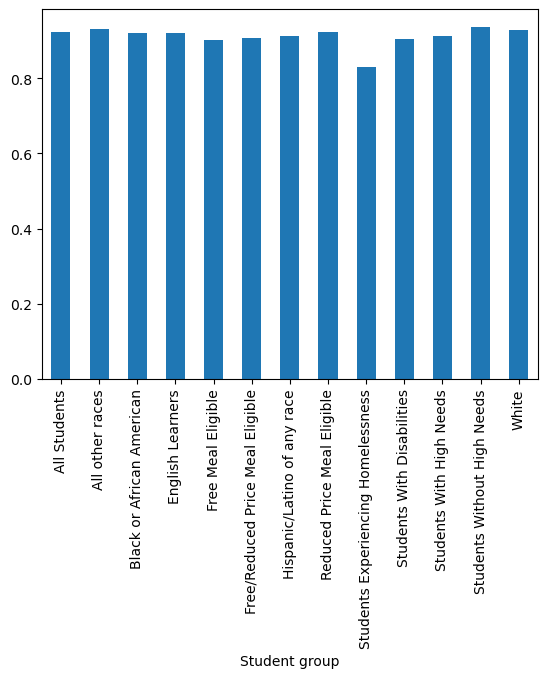

In [181]:
g = df2.groupby("Student group")["2021-2022 attendance rate - year to date"].mean()
g.plot.bar()



2) 

In [183]:
dd['2021'] = df2.groupby("Student group")["2021-2022 attendance rate - year to date"].mean()
dd['2020'] = df2.groupby("Student group")["2020-2021 attendance rate"].mean()
dd['2019'] = df2.groupby("Student group")["2019-2020 attendance rate"].mean()
dd

C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_22828\4231837271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['2021'] = df2.groupby("Student group")["2021-2022 attendance rate - year to date"].mean()
C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_22828\4231837271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['2020'] = df2.groupby("Student group")["2020-2021 attendance rate"].mean()
C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_22828\4231837271.py:3: SettingWithCopyWarning: 
A value is try

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Date update,2021,2020,2019
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,07/22/2022,NaN,NaN,NaN
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,07/22/2022,NaN,NaN,NaN
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,07/22/2022,NaN,NaN,NaN
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,07/22/2022,NaN,NaN,NaN
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,07/22/2022,NaN,NaN,NaN
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,07/22/2022,NaN,NaN,NaN
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,07/22/2022,NaN,NaN,NaN
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,07/22/2022,NaN,NaN,NaN
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,07/22/2022,NaN,NaN,NaN
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,07/22/2022,NaN,NaN,NaN
